## 示例: 判断单线和多段线是否在多边形区域内

In [1]:
from shapely import Polygon, LineString, MultiLineString

In [21]:
import matplotlib.pyplot as plt
import numpy as np

In [46]:
def line_in_polygon(multi_line, polygon, line):
    polygon.append(polygon[0])
    polygon_check = Polygon(polygon)

    x, y = polygon_check.exterior.xy
    plt.plot(x, y, label="polygon", c='red', marker='o')
    # a = LineString([(0, 0), (1, 1)])
    if line:
        line = LineString(line)
        print('line包含', polygon_check.contains(line))  # 包含
        print('line非严格包含', polygon_check.covers(line))  # 不严格包含
        print('line相交', polygon_check.intersects(line))  # 相交
        print('line内部', polygon_check.within(line))  # 内部
        color = np.random.randint(0, 255, 3).tolist()
        color = rgb_to_hex(color[0], color[1], color[2])
        x, y = line.xy
        plt.plot(x, y, label="line", c=color, marker='s')
    if multi_line:
        for idx, multi_line_single in enumerate(multi_line):
            color = np.random.randint(0, 255, 3).tolist()
            color = rgb_to_hex(color[0], color[1], color[2])
            single_line = LineString(multi_line_single)
            x, y = single_line.xy
            plt.plot(x, y, label=f"{idx}-line", c=color, marker='s')
        multi_line = MultiLineString(multi_line)
        print('multi包含', polygon_check.contains(multi_line))  # 包含
        print('multi非严格包含', polygon_check.covers(multi_line))  # 不严格包含
        print('multi相交', polygon_check.intersects(multi_line))  # 相交
        print('multi内部', polygon_check.within(multi_line))  # 内部

    plt.grid()
    plt.legend()
    plt.show()

In [17]:
def rgb_to_hex(r, g, b):
    return '#' + ('{:02X}' * 3).format(r, g, b)

In [58]:
polygon = [[0, 1], [0, 3], [3, 3], [1, 3]]

line=[[1, 2], [2, 2]]
# multi_line = [[[0, 2], [2, 3]], [[0, 3], [1, 2]]]
multi_line=[]

line包含 False
line非严格包含 False
line相交 False
line内部 False


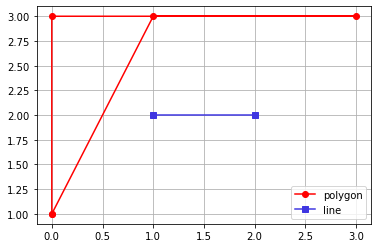

In [59]:
line_in_polygon(multi_line, polygon,line)

contains和within返回的结果是等效的，contains比covers有不同，contains一定要在内部或内部+边界有共点，covers在内部或边界有共点

In [61]:
polygon = [[1, 2], [6, 2], [7, 5], [6, 7], [1, 5]]

In [62]:
line=[[1, 2], [2, 2]]

line包含 False
line非严格包含 True
line相交 True
line内部 False


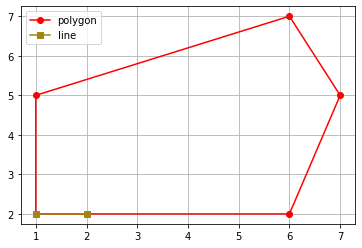

In [63]:
line_in_polygon(multi_line, polygon,line)

In [31]:
line=[[1, 2], [6, 2]]

line包含 False
line非严格包含 True
line相交 True
line内部 False


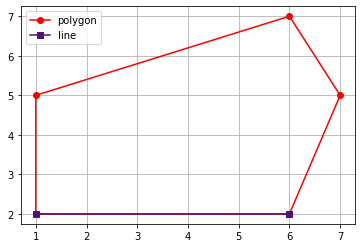

In [32]:
line_in_polygon(multi_line, polygon,line)

line包含 False
line非严格包含 False
line相交 True
line内部 False


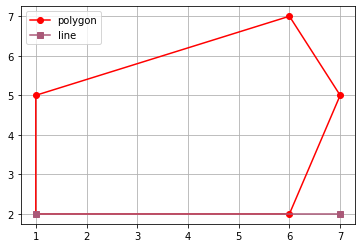

In [34]:
line=[[1, 2], [7, 2]]
line_in_polygon(multi_line, polygon,line)

line包含 False
line非严格包含 False
line相交 True
line内部 False


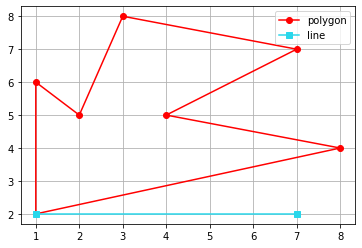

In [39]:
polygon=[[1, 2], [8, 4], [4, 5], [7, 7],[3, 8], [2, 5], [1, 6]]
line=[[1, 2], [7, 2]]
line_in_polygon(multi_line, polygon,line)

line包含 False
line非严格包含 False
line相交 True
line内部 False


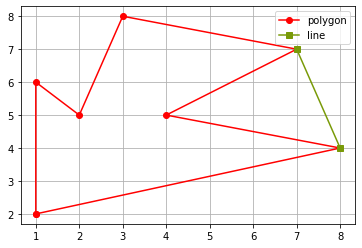

In [44]:
polygon=[[1, 2], [8, 4], [4, 5], [7, 7],[3, 8], [2, 5], [1, 6]]
line=[[7, 7], [8, 4]]
line_in_polygon(multi_line, polygon,line)

line包含 True
line非严格包含 True
line相交 True
line内部 False


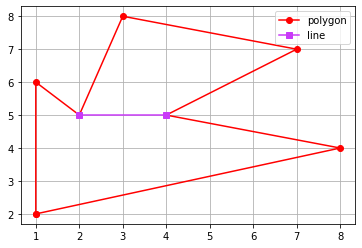

In [65]:
polygon=[[1, 2], [8, 4], [4, 5], [7, 7],[3, 8], [2, 5], [1, 6]]
line=[[2, 5], [4, 5]]
line_in_polygon(multi_line, polygon,line)

line包含 False
line非严格包含 False
line相交 True
line内部 False


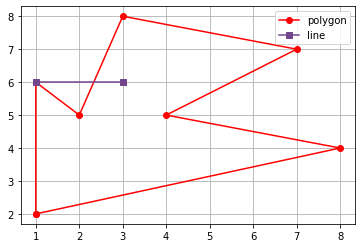

In [71]:
polygon=[[1, 2], [8, 4], [4, 5], [7, 7],[3, 8], [2, 5], [1, 6]]
line=[[1, 6], [3, 6]]
# multi_line = [[[0, 2], [2, 3]], [[0, 3], [1, 2]]]
multi_line=[]
line_in_polygon(multi_line, polygon,line)


line包含 False
line非严格包含 False
line相交 True
line内部 False


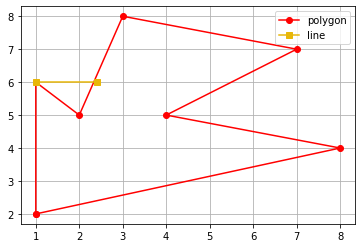

In [76]:
polygon=[[1, 2], [8, 4], [4, 5], [7, 7],[3, 8], [2, 5], [1, 6]]
line=[[1, 6], [2.4, 6]]
# multi_line = [[[0, 2], [2, 3]], [[0, 3], [1, 2]]]
multi_line=[]
line_in_polygon(multi_line, polygon,line)


multi包含 True
multi非严格包含 True
multi相交 True
multi内部 False


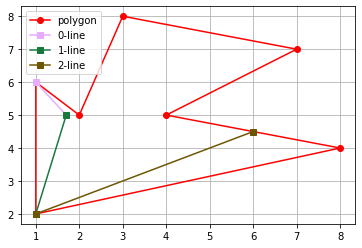

In [81]:
polygon=[[1, 2], [8, 4], [4, 5], [7, 7],[3, 8], [2, 5], [1, 6]]
# line=[[1, 6], [2.4, 6]]
line=[]
multi_line = [[[1, 6], [1.7, 5]], [[1.7, 5], [1, 2]], [[1, 2], [6, 4.5]]]
# multi_line=[]
line_in_polygon(multi_line, polygon,line)

multi包含 False
multi非严格包含 False
multi相交 True
multi内部 False


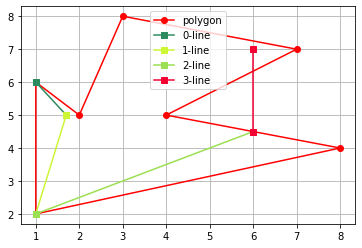

In [83]:
polygon=[[1, 2], [8, 4], [4, 5], [7, 7],[3, 8], [2, 5], [1, 6]]
# line=[[1, 6], [2.4, 6]]
line=[]
multi_line = [[[1, 6], [1.7, 5]], [[1.7, 5], [1, 2]], [[1, 2], [6, 4.5]], [[6, 4.5], [6, 7]]]
# multi_line=[]
line_in_polygon(multi_line, polygon,line)

multi包含 False
multi非严格包含 False
multi相交 True
multi内部 False


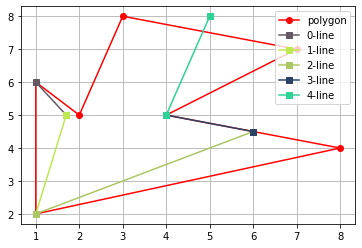

In [ ]:
polygon=[[1, 2], [8, 4], [4, 5], [7, 7],[3, 8], [2, 5], [1, 6]]
# line=[[1, 6], [2.4, 6]]
line=[]
multi_line = [[[1, 6], [1.7, 5]], [[1.7, 5], [1, 2]], [[1, 2], [6, 4.5]], [[6, 4.5], [4, 5]], [[4, 5], [5, 8]]]
# multi_line=[]
line_in_polygon(multi_line, polygon,line)

In [5]:
from shapely.geometry import Polygon, LineString, MultiPoint
from shapely.geometry.polygon import orient
import matplotlib.pyplot as plt
import numpy as np

def rgb_to_hex(r, g, b):
    return '#' + ('{:02X}' * 3).format(r, g, b)

def convex_cone(p0, pts):
    """
    以p0为原点,包含pts所有点的凸锥convex cone
    @param: p0 原点
    @param: pts 点列表
    
    @return: [angle_range_1, angle_range_2, ...] 以p0为原心的复数辐角范围,Degree
    """
    vectors = []
    for p in pts:
        vectors.append(complex(p[0]-p0[0], p[1]-p0[1]))
    angles = np.angle(vectors,deg=True)
    print(vectors)
    print("排序前角度", angles)
    
    # 初始向量
    vec_min = vectors[0]
    vec_max = vectors[0]
    angle_sort = []
    index_sort = []
    for i, vec in enumerate(vectors):
        a = np.angle(vec_min.conjugate()*vec, deg=True)
        print(f"{angles[i]}与min={np.angle(vec_min, deg=True)}的夹角,{a}")
        if a<0:
            vec_min = vec
            angle_sort.insert(0, angles[i])
            index_sort.insert(0, i)
            continue
        
        a = np.angle(vec_max.conjugate()*vec, deg=True)
        print(f"{angles[i]}与max={np.angle(vec_max, deg=True)}的夹角,{a}")
        if a>0:
            vec_max = vec
            angle_sort.append(angles[i])
            index_sort.append(i)
            continue
        
        angle_sort.insert(-1,angles[i])
        index_sort.insert(-1, i)
    print("排序后角度", angle_sort)
    return index_sort

class ConvexCone(object):
    def __init__(self, p0, pts):
        """
        以p0为原点,包含pts所有点的凸锥convex cone
        @param: p0 原点 [x,y]
        @param: pts 点列表 [(x,y),...]
        """
        self.origin = p0
        # 向量和辐角
        vectors = []
        for p in pts:
            vectors.append(complex(p[0]-self.origin[0], p[1]-self.origin[1]))
        
        # 计算锥边
        self.vec_min = vectors[0]
        self.vec_max = vectors[0]
        for i, vec in enumerate(vectors):
            a = np.angle(self.vec_min.conjugate()*vec, deg=True)
            if a<0:
                self.vec_min = vec
                continue

            a = np.angle(self.vec_max.conjugate()*vec, deg=True)
            if a>0:
                self.vec_max = vec
                continue
    
    def contains(self, point):
        """
        判断点是否在凸锥内
        @params: point 任意点 [x,y]
        @return: flag True/False
        """
        vec = complex(point[0]-self.origin[0], point[1]-self.origin[1])
        
        flag = True
        a = np.angle(self.vec_min.conjugate()*vec, deg=True)
        if a<0:
            flag = False

        a = np.angle(self.vec_max.conjugate()*vec, deg=True)
        if a>0:
            flag = False
        return flag
        
    
def segment_in_polygon(polygon_pts, line_pts):
    # 逆时针方向
    p = orient(Polygon(polygon_pts), sign=1.0)
    l = LineString(line_pts)
    
    hull = orient(p.convex_hull, sign=1.0)
    hull_pts = list(hull.exterior.coords)
    polygon_pts = list(p.exterior.coords)
    print(f"多边形的点", polygon_pts)
    print(f"凸包的点", hull_pts)
    
    compare_pts = [False] * len(polygon_pts)
    j = 0
    for i, pp in enumerate(polygon_pts):
        if pp == hull_pts[j]:
            compare_pts[i] = True
            j += 1
    if any(compare_pts) == False:
        print(f"是凸多边形")
    else:
        print(f"非凸多边形")
    print(compare_pts)
    
    caves = hull.difference(p)
    visibility = True
    if caves.geom_type == 'Polygon':
        cave_lst = [caves]
    elif caves.geom_type == 'MultiPolygon':
        cave_lst = list(caves.geoms)
    for obs in cave_lst:
        if obs.geom_type != 'Polygon':
            continue
        obs_pts = list(obs.exterior.coords)
        for k, p1 in enumerate(line_pts[0:-1]):
            p2 = line_pts[k+1]
            plt.annotate("p1", xy=p1, xytext=(-5,5), textcoords='offset points')
            plt.annotate("p2", xy=p2, xytext=(-5,5), textcoords='offset points')

            print("p1", p1)
            print("p2", p2)

            # 以p1为原点,obs顶点构成的凸锥convex cone
            pts_index = convex_cone(p1, obs_pts[:-1])
            for i, idx in enumerate(pts_index):
                plt.annotate("%d" % i, xy=obs_pts[idx], xytext=(-5,5), textcoords='offset points')
            
            # 画凸锥
            color = np.random.randint(0, 255, 3).tolist()
            color = rgb_to_hex(color[0], color[1], color[2])
            
            x = [p1[0], obs_pts[pts_index[0]][0]]
            y = [p1[1], obs_pts[pts_index[0]][1]]
            plt.plot(x, y, label="cone_MIN", c=color, marker='^', linestyle='-')
            x = [p1[0], obs_pts[pts_index[-1]][0]]
            y = [p1[1], obs_pts[pts_index[-1]][1]]
            plt.plot(x, y, label="cone_MAX", c=color, marker='^', linestyle='--')
            
            # 构成凸锥
            cone = ConvexCone(p1, obs_pts[:-1])
            print("p2是否在凸锥内：", cone.contains(p2))
            # 点在凸锥内，不可见。点在凸锥外，可见。
            visibility = not cone.contains(p2)
            if visibility == False:
                break
        if visibility == False:
            print("segment不在多边形内部")
            break
            
    
    
    # 画多边形
    x, y = p.exterior.xy
    plt.plot(x, y, label="polygon", c='red', marker='o')
    # 画多边形凸包
    x, y = hull.exterior.xy
    plt.plot(x, y, label="polygon", c='yellow', marker='.', linestyle='--')
    # 画折线
    x, y = l.xy
    plt.plot(x, y, label="line", c='black', marker='s')

    plt.grid()
    plt.legend()
    plt.show()

多边形的点 [(1.0, 2.0), (8.0, 4.0), (7.0, 7.0), (3.0, 8.0), (3.0, 7.0), (2.0, 5.0), (1.0, 6.0), (1.0, 2.0)]
凸包的点 [(1.0, 2.0), (8.0, 4.0), (7.0, 7.0), (3.0, 8.0), (1.0, 6.0), (1.0, 2.0)]
非凸多边形
[True, True, True, True, False, False, True, True]
p1 [5, 6]
p2 [6, 4]
[(-2+2j), (-2+1j), (-3-1j), (-4+0j)]
排序前角度 [ 135.          153.43494882 -161.56505118  180.        ]
135.0与min=135.0的夹角,0.0
135.0与max=135.0的夹角,0.0
153.434948822922与min=135.0的夹角,18.43494882292201
153.434948822922与max=135.0的夹角,18.43494882292201
-161.565051177078与min=135.0的夹角,63.43494882292201
-161.565051177078与max=153.434948822922的夹角,45.0
180.0与min=135.0的夹角,45.0
180.0与max=-161.565051177078的夹角,-18.43494882292201
排序后角度 [135.0, 153.434948822922, 180.0, -161.565051177078]
p2是否在凸锥内： False


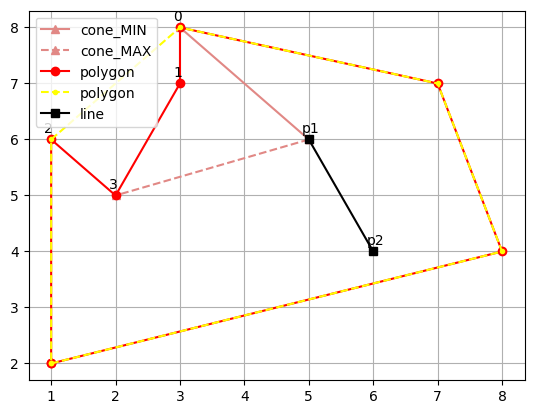

In [6]:
# polygon=[[1, 2], [8, 4], [4, 5], [7, 7], [3, 8],[3, 7], [2, 5], [1, 6]]
polygon=[[1, 2], [8, 4], [7, 7], [3, 8],[3, 7], [2, 5], [1, 6]]
line = [[5,6], [6,4]]
segment_in_polygon(polygon,line)

In [4]:
a=[1,2,34]
a.insert(-1,0)
a

[1, 2, 0, 34]

In [9]:
a=list(range(10))
a

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [12]:
list(np.array(a)+1)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]